In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [2]:
data  = pd.read_csv('spam.csv' ,encoding= 'latin_1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
list_drop = ['Unnamed: 3' ,'Unnamed: 2' ,'Unnamed: 4']


In [6]:
df=data.drop(list_drop,axis=1)


In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df=df.rename(columns={"v1":"label","v2":"Email"})


In [9]:
df.sample(30)

,label,Email
5102,spam,This msg is for your mobile content order It h...
2596,ham,No i'm not gonna be able to. || too late notic...
3557,ham,No da. . Vijay going to talk in jaya tv
705,ham,I don't think I can get away for a trek that l...
415,ham,Whatsup there. Dont u want to sleep
4041,ham,What time do u get out?
2937,ham,Hey i've booked the pilates and yoga lesson al...
3142,ham,Boy; I love u Grl: Hogolo Boy: gold chain kods...
3121,spam,Free entry in 2 a weekly comp for a chance to ...
2096,ham,I'm done...


In [10]:
df['Length']=df['Email'].apply(len)


In [11]:
df

,label,Email,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [12]:
df['label'].replace({'spam': 1, 'ham': 0}, inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   Email   5572 non-null   object
 2   Length  5572 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 130.7+ KB


In [14]:
df['label' ] =pd.to_numeric(df['label' ])

In [15]:
df.sample(10)

,label,Email,Length
766,0,"I'm nt goin, got somethin on, unless they meet...",103
1075,0,Oi. Ami parchi na re. Kicchu kaaj korte iccha ...,83
2809,0,Mm so you asked me not to call radio,36
4131,0,Hi baby ive just got back from work and i was ...,147
1555,0,Ok i found dis pierre cardin one which looks n...,73
5033,0,I want to go to perumbavoor,27
1893,0,Good Morning plz call me sir,28
1961,0,LOL that would be awesome payback.,34
186,0,"Haha awesome, be there in a minute",34
4229,0,And several to you sir.,23


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   Email   5572 non-null   object
 2   Length  5572 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 130.7+ KB


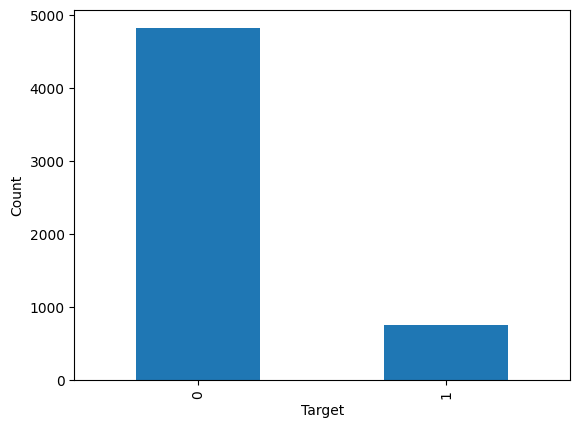

In [17]:
df['label'].value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [18]:
X_train, X_test, y_train, y_test= train_test_split(df['Email'], df['label'], test_size=0.25, random_state=0)


In [19]:
text_clf_knn = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF vectorizer
    ('KNN', KNeighborsClassifier())  # K-Nearest Neighbors classifier
])


In [20]:
text_clf_knn.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('KNN', KNeighborsClassifier())])

In [21]:
predictions = text_clf_knn.predict(X_test)


## SVM

In [22]:
text_clf_SVM = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('SVM', SVC())  
])

# Train the pipeline
text_clf_SVM.fit(X_train, y_train)

# Make predictions on test data
predictions_SVM = text_clf_SVM.predict(X_test)

In [23]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_SVM))

[[1196    0]
 [  30  167]]


In [24]:
print(metrics.classification_report(y_test,predictions_SVM)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1196
           1       1.00      0.85      0.92       197

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [25]:
print(metrics.accuracy_score(y_test,predictions_SVM)) 

0.9784637473079684


## DT

In [26]:
text_clf_DT = Pipeline([
    ('tfidf', TfidfVectorizer()),  
    ('Decision_Tree', DecisionTreeClassifier())  
])

In [27]:
text_clf_DT.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Decision_Tree', DecisionTreeClassifier())])

In [28]:
predictions_DT = text_clf_DT.predict(X_test)


In [29]:
print(metrics.confusion_matrix(y_test, predictions_DT))


[[1171   25]
 [  42  155]]


In [30]:
print(metrics.classification_report(y_test, predictions_DT))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1196
           1       0.86      0.79      0.82       197

    accuracy                           0.95      1393
   macro avg       0.91      0.88      0.90      1393
weighted avg       0.95      0.95      0.95      1393



In [31]:
accuracy_DT = metrics.accuracy_score(y_test, predictions_DT)


## LR

In [32]:
text_clf_LR = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF vectorizer
    ('LogisticRegression', LogisticRegression())  # Logistic Regression classifier
])

In [33]:
text_clf_LR.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression())])

In [34]:
predictions_LR = text_clf_LR.predict(X_test)


In [35]:
print(metrics.confusion_matrix(y_test, predictions_LR))


[[1196    0]
 [  48  149]]


In [36]:
print(metrics.classification_report(y_test, predictions_LR))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1196
           1       1.00      0.76      0.86       197

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.96      1393



In [37]:
accuracy_LR = metrics.accuracy_score(y_test, predictions_LR)
print("Accuracy Score:", accuracy_LR)

Accuracy Score: 0.9655419956927495


## KNN

In [45]:
text_clf_KNN = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF vectorizer
    ('KNN', KNeighborsClassifier())  # K-Nearest Neighbors classifier
])

In [46]:
text_clf_KNN.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('KNN', KNeighborsClassifier())])

In [47]:
predictions_KNN = text_clf_KNN.predict(X_test)


In [48]:
print(metrics.confusion_matrix(y_test, predictions_KNN))


[[1196    0]
 [ 131   66]]


In [49]:
print(metrics.classification_report(y_test, predictions_KNN))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1196
           1       1.00      0.34      0.50       197

    accuracy                           0.91      1393
   macro avg       0.95      0.67      0.72      1393
weighted avg       0.92      0.91      0.88      1393



In [50]:
accuracy_KNN = metrics.accuracy_score(y_test, predictions_KNN)
print("Accuracy Score:", accuracy_KNN)

Accuracy Score: 0.9059583632447954
